In [1]:
# idea of this notebook: train a ML model with the standard deviation input variables to estimate if a location is suited for generating wind power
# Imports
import pandas as pd
import seaborn as sns
from random import randint

In [3]:
# load full data
data = pd.read_parquet('../data/full_df.pqt')
# drop useless cols
data = data[['temp','dwpt', 'rhum', 'prcp','wspd', 'wpgt','pres','id']]

# load aggregated data
std_data = pd.read_parquet('../data/std_data.pqt')
mean_data = pd.read_parquet('../data/all_means_df.pqt')

In [4]:
# get the na counts for each col
nacounts = pd.concat([
    data.loc[data[col].isna() == False].groupby(['id'])[col].count()
    for col in data.columns
],axis=1)

In [5]:
# use only ids with sufficient data points
mean_data_filtered = mean_data.loc[nacounts.wspd > 50]

In [6]:
# choose a cutoff percentile, if the mean wspd of a given location is greater it's suitable for wind power generation
cutoff_percentile = .6
cutoff_wspd = mean_data_filtered.sort_values('wspd',ascending=True).iloc[round(cutoff_percentile*len(mean_data_filtered))].wspd
# add the col suitable 
mean_data_filtered.loc[:,'suitable'] = 0
mean_data_filtered.loc[mean_data_filtered.wspd > cutoff_wspd,'suitable'] = 1
# set the y data for the ml algorithm
y = mean_data_filtered.suitable

G:\Anaconda\envs\mapenv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
G:\Anaconda\envs\mapenv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [7]:
# use the std as x data
x = std_data.loc[y.index]

In [8]:
# fill missing values with mean of col, drop wind data to simulate missing data
x.fillna(x.mean(),inplace=True)
x.drop(['wspd','wpgt'],inplace=True,axis=1)

In [9]:
# train test split
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y,
    test_size=.2,
    stratify=y,
    random_state=1
)

In [10]:
# import Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
# run models

# collect accuracy scores in dict to compare
acc_dict = {} 
##### Decision Tree

# Fitting des Decision Tree Algorithmus auf den Trainingsdatensatz
decision_tree_train = DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=1)
decision_tree_train.fit(xtrain, ytrain)

# Der Decision Tree Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("Prognosegenauigkeit Decision Tree:\n")
print("Testdaten:\t", decision_tree_train.score(xtest, ytest))
acc_dict['decision tree'] = decision_tree_train.score(xtest, ytest)

##### Random Forest

# Fitting des Random Forest Algorithmus auf den Trainingsdatensatz
random_forest_train = RandomForestClassifier(random_state=1)
random_forest_train.fit(xtrain, ytrain)

# Der Random Forest Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("\n\nPrognosegenauigkeit Random Forest:\n")
print("Testdaten:\t", random_forest_train.score(xtest, ytest))
acc_dict['random forest']= random_forest_train.score(xtest, ytest)


##### Logistic Regression

# Fitting des Logistic Regression Algorithmus auf den Trainingsdatensatz
logistic_regression_train = LogisticRegression(max_iter=1000)
logistic_regression_train.fit(xtrain, ytrain)

# Der Logistic Regression Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("\n\nPrognosegenauigkeit Logistic Regression:\n")
print("Testdaten:\t", logistic_regression_train.score(xtest, ytest))
acc_dict['logistic regression']= logistic_regression_train.score(xtest, ytest)


##### K-Nearest Neighbors

# Fitting des K-Nearest Neighbors Algorithmus auf den Trainingsdatensatz
knn_train = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_train.fit(xtrain, ytrain)

# Der K-Nearest Neighbors Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("\n\nPrognosegenauigkeit K-Nearest Neighbors:\n")
print("Testdaten:\t", knn_train.score(xtest, ytest))
acc_dict['knearest neighbors']=knn_train.score(xtest, ytest)

##### Neuronales Netz

# Fitting des Neuronalen Netz Algorithmus auf den Trainingsdatensatz
neuronales_netz_train = MLPClassifier(max_iter=1000)
neuronales_netz_train.fit(xtrain, ytrain)

# Der Neuronales Netz Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("\n\nPrognosegenauigkeit Neuronales Netz:\n")
print("Testdaten:\t", neuronales_netz_train.score(xtest, ytest))
acc_dict['neuronales netz']=neuronales_netz_train.score(xtest, ytest)

##### Gradient Tree Boosting

# Fitting des Gradient Boosting Algorithmus auf den Trainingsdatensatz
gradient_booosting_train = GradientBoostingClassifier()
gradient_booosting_train.fit(xtrain, ytrain)

# Der Gradient Boosting Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("\n\nPrognosegenauigkeit Gradient Tree Boosting:\n")
print("Testdaten:\t", gradient_booosting_train.score(xtest, ytest))
acc_dict['gradient boosting']= gradient_booosting_train.score(xtest, ytest)


Prognosegenauigkeit Decision Tree:

Testdaten:	 0.7681159420289855


Prognosegenauigkeit Random Forest:

Testdaten:	 0.782608695652174


Prognosegenauigkeit Logistic Regression:

Testdaten:	 0.7971014492753623


Prognosegenauigkeit K-Nearest Neighbors:

Testdaten:	 0.7681159420289855


Prognosegenauigkeit Neuronales Netz:

Testdaten:	 0.6956521739130435


Prognosegenauigkeit Gradient Tree Boosting:

Testdaten:	 0.7536231884057971


<AxesSubplot:>

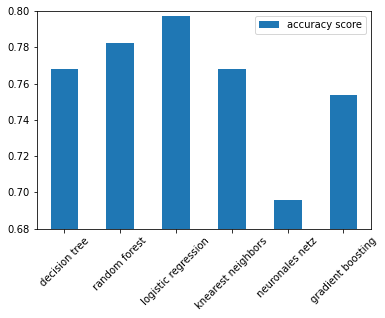

In [39]:
# turn accuracy dict into dataframe and plot
acc_df = pd.DataFrame(acc_dict,index=['accuracy score']).T
acc_df.plot(kind='bar',ylim=(0.68,0.8),rot=45)
# logistic_regression_train shows the highest accuracy score
# we still chose to use the random_forest_train because log_reg led to a large number of negatives

In [40]:
acc_df.to_csv('../data/acc_df_std.csv')

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,random_forest_train.predict(xtest))

array([[39,  3],
       [12, 15]], dtype=int64)

In [ ]:
# choosing the random forest since the accuracy is high and leads to some positive predictions
# predict the suitability of all x-data
# start by creating full x data
full_x = std_data.fillna(std_data.mean()).drop(['wspd','wpgt'],axis=1)

In [ ]:
# instantiate new algorithm, train it with all the data
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(x,y)
full_x.loc[:,'prediction_suitable'] = random_forest.predict(full_x)

In [ ]:
full_x.prediction_suitable.value_counts()

0    921
1    167
Name: prediction_suitable, dtype: int64

In [ ]:
# export data
full_x.to_csv('../data/wind_model_prediction.csv')